## Starbucks Customer Segmentation
The following is data simulated by Starbucks modeling customers' spending habbits in relation to different promotions that they have been sent.<br>
**Goal** 
<br>The goal is to get an idea of the different types of customers shopping at Starbucks.<br>

In [1]:
import pandas as pd
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns

/Users/prcork/scikit-learn/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
sb = pd.read_csv("starbucks_customers.csv")

In [3]:
sb = sb.drop("person", axis=1)
sb = sb.drop("member_date", axis=1)
sb = pd.get_dummies(data=sb, columns=['gender'])
sb = sb.fillna(0)

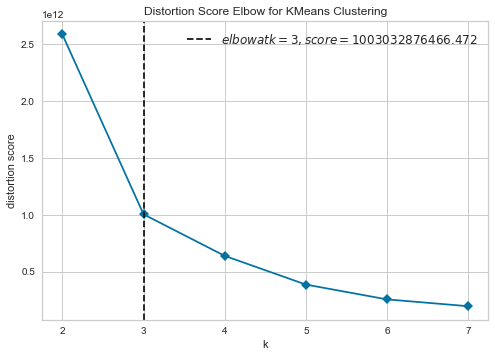

In [4]:
# Instantiate a scikit-learn K-Means model
k_model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(k_model, k=(2,8), timings=False)

# Fit the data and visualize
visualizer.fit(sb)    
visualizer.poof()   

In [5]:
agg_model = AgglomerativeClustering(n_clusters=3)
agg_model = agg_model.fit_predict(sb)
print(agg_model)

[2 2 0 ... 0 0 2]


In [6]:
sb['Cluster'] = agg_model 
sb[:5]

,Unnamed: 0,discount_total_offers,discount_completion_pct,discount_min_completion_days,discount_max_completion_days,discount_completed_offers,discount_avg_completion_days,discount_avg_net_reward,bogo_total_offers,bogo_completion_pct,...,max_transaction_day,avg_transaction,total_transaction_amount,median_days_between_purchases,avg_days_between_purchases,gender_F,gender_M,gender_O,gender_U,Cluster
0,0,1.0,1.0,0.0,0.0,1.0,0.0,-8.0,1.0,1.0,...,696.0,15.950000,127.60,27.0,59.25,0,1,0,0,2
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,474.0,1.363333,4.09,18.0,62.00,0,0,0,1,2
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,654.0,15.892000,79.46,66.0,105.60,0,0,1,0,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,708.0,24.607500,196.86,21.0,82.50,1,0,0,0,1
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,672.0,12.837500,154.05,30.0,53.00,1,0,0,0,0


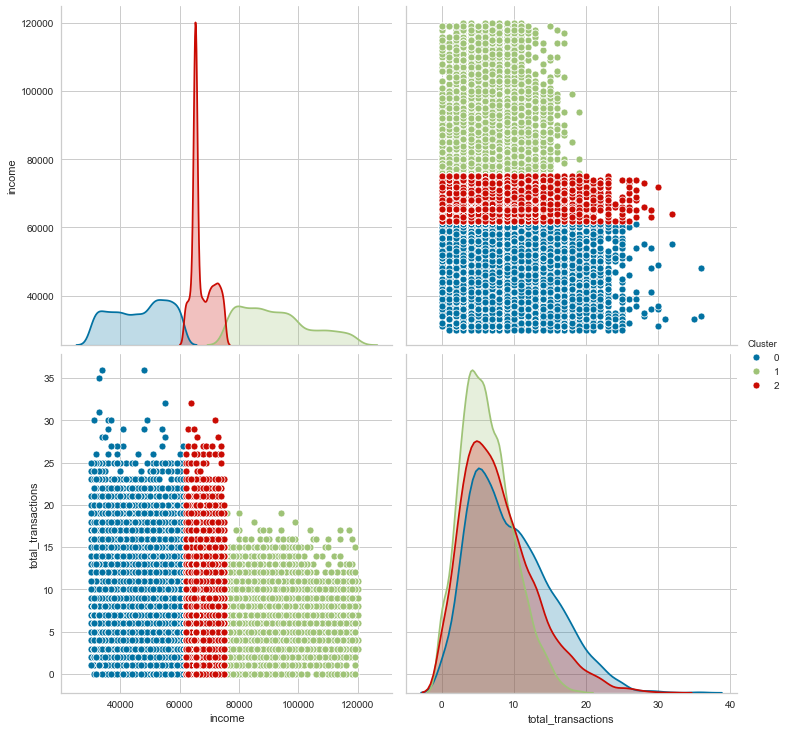

In [7]:
g_inc = sns.pairplot(sb, hue="Cluster", vars=["income","total_transactions"], height=5)

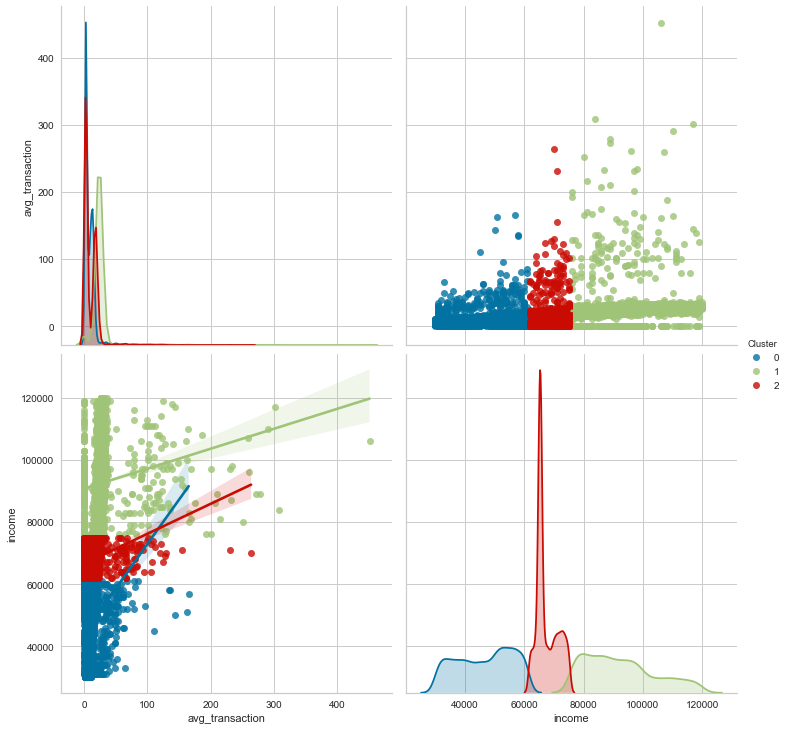

In [8]:
g_avg = sns.pairplot(sb, hue="Cluster", vars=["avg_transaction","income"], height=5, kind="reg")

## Starbucks Customer Takeaways


### Income & Total Transactions
Based on the above pair plots, a few initial interesting takeaways can be unraveled from the dataset. First, this dataset seems to suggest there is a inverse relationship between income and the total number of transactions in a given account. Perhaps this relationship could be explained by individuals in higher income brackets preferring Starbucks alternatives perceived as more luxurious or high-end in comparison. On the other end of the extreme, perhaps those in lower income brackets rely on Starbucks for reliable wifi or meeting spaces and thus complete more transactions as a side effect of other desirable offerings Starbucks provides.

### Income & Average Transactions
When considering Income in comparison to Average Transactions, one can see a strong band of what might be considered "typical users" who have a similar average transaction value regardless of income. In addition to this, we can also observe a upward trendline in the Average Transaction increasing as income increases.
